In [1]:
os.getcwd()

'/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork'

In [2]:

from datetime import date, datetime
from typing import Union
import demeter.indicator
from demeter import TokenInfo, PoolBaseInfo, Runner, Strategy, Asset, AccountStatus, CollectFeeAction, SellAction, RowData, \
    ChainType
import pandas as pd


In [3]:
# constant_interval.py -- 3000

import demeter as dt
from demeter import PoolBaseInfo, Runner
from demeter._typing import TokenInfo, AccountStatus, Asset
from datetime import date
from demeter.download import ChainType

# from strategy_ploter1 import  plot_position_return_decomposition
ETH = TokenInfo(name="eth", decimal=18)
usdc = TokenInfo(name="usdc", decimal=6)
from IPython.display import (display, display_html, display_png, display_svg)
import  matplotlib.pyplot as plt
import numpy as np


In [4]:

class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        # self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    # def rebalance(self, price):
    #     status: AccountStatus = self.broker.get_account_status(price)
    #     base_amount = status.net_value / 2
    #     quote_amount_diff = base_amount / price - status.quote_balance
    #     if quote_amount_diff > 0:
    #         self.buy(quote_amount_diff)
    #     elif quote_amount_diff < 0:
    #         self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.3, usdc)

    runner_instance = Runner(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, 2000)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth3000"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8",
                              date(2022, 10, 1),
                              date(2022, 10, 30))
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)

    # runner_instance.broker.get_account_status(runner_instance.final_status.uncollect_fee_base)
    # plot_position_return_decomposition(runner_instance.account_status_list)



2022-11-01 15:24:44,982 - INFO - start load files...
2022-11-01 15:24:45,164 - INFO - load file complete, preparing...
2022-11-01 15:24:47,049 - INFO - data has benn prepared
2022-11-01 15:24:47,050 - INFO - init strategy...
2022-11-01 15:24:47,054 - INFO - start main loop...


eth_value 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43196/43196 [00:02<00:00, 15896.72it/s]
2022-11-01 15:24:49,786 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-01 15:24:49,822 - INFO - run evaluating indicator
2022-11-01 15:24:49,823 - INFO - back testing finish


In [5]:
df = pd.DataFrame(runner_instance.account_status_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43196 entries, 0 to 43195
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            43196 non-null  datetime64[ns]
 1   base_balance         43196 non-null  object        
 2   quote_balance        43196 non-null  object        
 3   uncollect_fee_base   43196 non-null  object        
 4   uncollect_fee_quote  43196 non-null  object        
 5   base_in_position     43196 non-null  object        
 6   quote_in_position    43196 non-null  object        
 7   net_value            43196 non-null  object        
 8   price                43196 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.0+ MB


In [6]:
df['diff_fee_base'] = df['uncollect_fee_base'].diff()
df['diff_fee_quote'] = df['uncollect_fee_quote'].diff()


In [7]:

df['fee_3000'] = df['diff_fee_base'] + df['diff_fee_quote'] * df['price']
# df.head()
df


,timestamp,base_balance,quote_balance,uncollect_fee_base,uncollect_fee_quote,base_in_position,quote_in_position,net_value,price,diff_fee_base,diff_fee_quote,fee_3000
0,2022-10-01 00:04:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1325.4975usdc/eth,NaN,NaN,NaN
1,2022-10-01 00:05:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1325.8952usdc/eth,0,0,0E-24
2,2022-10-01 00:06:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1325.8952usdc/eth,0,0,0E-24
3,2022-10-01 00:07:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1326.8236usdc/eth,0,0,0E-24
4,2022-10-01 00:08:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1326.8236usdc/eth,0,0,0E-24
...,...,...,...,...,...,...,...,...,...,...,...,...
43191,2022-10-30 23:55:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1588.6409usdc/eth,0.000,0.000,0E-27
43192,2022-10-30 23:56:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1588.6409usdc/eth,0.000,0.000,0E-27
43193,2022-10-30 23:57:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1588.4820usdc/eth,0.000,0.000,0E-27
43194,2022-10-30 23:58:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1588.4820usdc/eth,0.000,0.000,0E-27


In [8]:
# constant_interval.py -- 500


class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        # self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    # def rebalance(self, price):
    #     status: AccountStatus = self.broker.get_account_status(price)
    #     base_amount = status.net_value / 2
    #     quote_amount_diff = base_amount / price - status.quote_balance
    #     if quote_amount_diff > 0:
    #         self.buy(quote_amount_diff)
    #     elif quote_amount_diff < 0:
    #         self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.05, usdc)

    runner_instance = Runner(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, 2000)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth500"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640",
                              date(2022, 10, 1),
                              date(2022, 10, 30))
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)



2022-11-01 15:25:44,181 - INFO - start load files...
2022-11-01 15:25:44,425 - INFO - load file complete, preparing...
2022-11-01 15:25:45,900 - INFO - data has benn prepared
2022-11-01 15:25:45,900 - INFO - init strategy...
2022-11-01 15:25:45,901 - INFO - start main loop...


eth_value 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43200/43200 [00:03<00:00, 13900.23it/s]
2022-11-01 15:25:49,012 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-01 15:25:49,059 - INFO - run evaluating indicator
2022-11-01 15:25:49,060 - INFO - back testing finish


In [9]:
df1 = pd.DataFrame(runner_instance.account_status_list)
df1

,timestamp,base_balance,quote_balance,uncollect_fee_base,uncollect_fee_quote,base_in_position,quote_in_position,net_value,price
0,2022-10-01 00:00:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1328.6824usdc/eth
1,2022-10-01 00:01:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1328.6824usdc/eth
2,2022-10-01 00:02:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1328.6824usdc/eth
3,2022-10-01 00:03:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1328.6824usdc/eth
4,2022-10-01 00:04:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1328.5495usdc/eth
...,...,...,...,...,...,...,...,...,...
43195,2022-10-30 23:55:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1591.3437usdc/eth
43196,2022-10-30 23:56:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1592.1395usdc/eth
43197,2022-10-30 23:57:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1592.1395usdc/eth
43198,2022-10-30 23:58:00,2000usdc,0eth,0usdc,0eth,0usdc,0eth,2000usdc,1590.5483usdc/eth


In [10]:
df1['diff_fee_base'] = df1['uncollect_fee_base'].diff()
df1['diff_fee_quote'] = df1['uncollect_fee_quote'].diff()
df1['fee_500'] = df1['diff_fee_base'] + df1['diff_fee_quote'] * df1['price']


In [11]:
# merge
df_all = df.merge(df1, on = 'timestamp', how = 'left')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43196 entries, 0 to 43195
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              43196 non-null  datetime64[ns]
 1   base_balance_x         43196 non-null  object        
 2   quote_balance_x        43196 non-null  object        
 3   uncollect_fee_base_x   43196 non-null  object        
 4   uncollect_fee_quote_x  43196 non-null  object        
 5   base_in_position_x     43196 non-null  object        
 6   quote_in_position_x    43196 non-null  object        
 7   net_value_x            43196 non-null  object        
 8   price_x                43196 non-null  object        
 9   diff_fee_base_x        43195 non-null  object        
 10  diff_fee_quote_x       43195 non-null  object        
 11  fee_3000               43195 non-null  object        
 12  base_balance_y         43196 non-null  object        
 13  q

In [11]:

df_all[['fee_3000','fee_500']].describe()

,fee_3000,fee_500
count,43195,43196
unique,7167,36881
top,0E-59,0E-56
freq,35958,6310


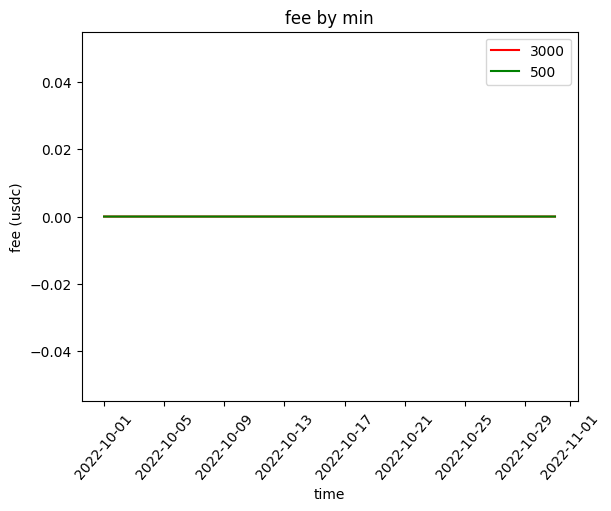

In [12]:
# 画图
%matplotlib inline

plt.figure()
fee_3000 = list(df_all['fee_3000'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500'].apply(pd.to_numeric))
timestamp = list(df_all['timestamp'])
plt.plot(timestamp, fee_3000, c='red', label="3000")
plt.plot(timestamp, fee_500, c='green', label="500")
plt.title('fee by min')
plt.legend()
plt.xlabel('time')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [13]:
# by day

df_all['Date'] = pd.to_datetime(df_all['timestamp'].dt.date)
df_all['fee_3000_day'] = df_all['fee_3000'].groupby(df_all['Date']).transform('sum')
df_all['fee_500_day'] = df_all['fee_500'].groupby(df_all['Date']).transform('sum')

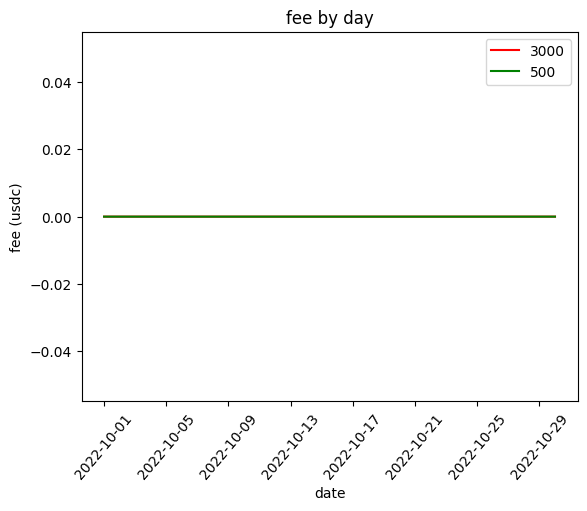

In [14]:
plt.figure()
fee_3000 = list(df_all['fee_3000_day'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500_day'].apply(pd.to_numeric))
date = list(df_all['Date'])
plt.plot(date, fee_3000, c='red', label="3000")
plt.plot(date, fee_500, c='green', label="500")
plt.legend()
plt.title('fee by day')
plt.xlabel('date')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()